In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pnd

df1 = pnd.read_csv('train.csv')
df2 = pnd.read_csv('test.csv')

In [76]:
df1.drop(df1.columns[[19, 20, 21]], axis=1, inplace=True)
df2.drop(df2.columns[[18]], axis=1, inplace=True)
df1.isnull().sum()/len(df1)*100


ID                        0.000000
comp_name                 0.000000
website                   6.134832
op_status                 0.000000
domain                    5.485788
founded_on               25.397260
hq_country_code          11.222739
hq_state_code            13.898491
hq_region                13.048019
hq_city                  13.043046
total_funding_usd        19.056027
funding_rounds            0.000000
first_funding_date        0.000000
last_funding_date         0.000000
num_investors             0.000000
funding_duration          0.000000
first_funding_utc         0.000000
last_funding_utc          0.000000
successful_investment     0.000000
dtype: float64

In [77]:
df1.drop(['founded_on'], inplace=True, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40213 entries, 0 to 40212
Data columns (total 18 columns):
ID                       40213 non-null int64
comp_name                40213 non-null object
website                  37746 non-null object
op_status                40213 non-null object
domain                   38007 non-null object
hq_country_code          35700 non-null object
hq_state_code            34624 non-null object
hq_region                34966 non-null object
hq_city                  34968 non-null object
total_funding_usd        32550 non-null float64
funding_rounds           40213 non-null int64
first_funding_date       40213 non-null object
last_funding_date        40213 non-null object
num_investors            40213 non-null int64
funding_duration         40213 non-null int64
first_funding_utc        40213 non-null int64
last_funding_utc         40213 non-null int64
successful_investment    40213 non-null int64
dtypes: float64(1), int64(7), object(10)
memory usa

In [78]:
df1['website'].fillna(df1['website'].mode()[0], inplace=True)
df1['domain'].fillna(df1['domain'].mode()[0], inplace=True)
df1['hq_country_code'].fillna(df1['hq_country_code'].mode()[0], inplace=True)
df1['hq_state_code'].fillna(df1['hq_state_code'].mode()[0], inplace=True)
df1['hq_region'].fillna(df1['hq_region'].mode()[0], inplace=True)
df1['hq_city'].fillna(df1['hq_city'].mode()[0], inplace=True)
df1['total_funding_usd'].fillna(df1['total_funding_usd'].mode()[0], inplace=True)

In [79]:
#calcualting the variance
#variables with a low variance will not affect the target variable
df1.var()

ID                       1.347605e+08
total_funding_usd        3.913566e+16
funding_rounds           2.237362e+00
num_investors            2.400574e+01
funding_duration         6.081422e+05
first_funding_utc        1.983108e+06
last_funding_utc         1.771644e+06
successful_investment    1.146682e-01
dtype: float64

In [80]:
#calcualting the variance
#variables with a low variance will not affect the target variable
df1.corr()

,ID,total_funding_usd,funding_rounds,num_investors,funding_duration,first_funding_utc,last_funding_utc,successful_investment
ID,1.000000,-0.001037,-0.003239,-0.001445,-0.000589,0.002331,0.002101,-0.004850
total_funding_usd,-0.001037,1.000000,0.126302,0.115332,0.104179,-0.047347,0.010942,0.057733
funding_rounds,-0.003239,0.126302,1.000000,0.626069,0.748669,-0.215163,0.210982,0.118024
num_investors,-0.001445,0.115332,0.626069,1.000000,0.502424,-0.181112,0.102738,0.143458
funding_duration,-0.000589,0.104179,0.748669,0.502424,1.000000,-0.373167,0.191067,0.150158
first_funding_utc,0.002331,-0.047347,-0.215163,-0.181112,-0.373167,1.000000,0.839365,-0.355545
last_funding_utc,0.002101,0.010942,0.210982,0.102738,0.191067,0.839365,1.000000,-0.288197
successful_investment,-0.004850,0.057733,0.118024,0.143458,0.150158,-0.355545,-0.288197,1.000000


In [81]:
df1=df1.drop('first_funding_utc', 1)
df1=df1.drop('funding_duration', 1)

In [82]:
df1['ID'].nunique()

40213

In [83]:
df1['comp_name'].nunique()

40082

In [84]:
df1['website'].nunique()

37677

In [85]:
df1['op_status'].nunique()

4

In [86]:
df1['domain'].nunique()

17646

In [87]:
df1['first_funding_date'].nunique()

4505

In [88]:
df1['last_funding_date'].nunique()

4225

In [89]:
df2['hq_country_code'].nunique()

78

In [90]:
df1['hq_state_code'].nunique()

293

In [91]:
df1['hq_region'].nunique()

961

In [92]:
df1['hq_city'].nunique()

3411

In [93]:
df1.drop(['ID', 'comp_name', 'website', 'domain', 'first_funding_date', 'last_funding_date', 'hq_city'], inplace=True, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40213 entries, 0 to 40212
Data columns (total 9 columns):
op_status                40213 non-null object
hq_country_code          40213 non-null object
hq_state_code            40213 non-null object
hq_region                40213 non-null object
total_funding_usd        40213 non-null float64
funding_rounds           40213 non-null int64
num_investors            40213 non-null int64
last_funding_utc         40213 non-null int64
successful_investment    40213 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 2.8+ MB


In [94]:
df2.drop(['ID', 'comp_name', 'first_funding_utc', 'founded_on' ,'funding_duration', 'website', 'domain', 'first_funding_date', 'last_funding_date', 'hq_city'], inplace=True, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 8 columns):
op_status            4469 non-null object
hq_country_code      4001 non-null object
hq_state_code        3893 non-null object
hq_region            3914 non-null object
total_funding_usd    3619 non-null float64
funding_rounds       4469 non-null int64
num_investors        4469 non-null int64
last_funding_utc     4469 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 279.4+ KB


In [95]:
df2['total_funding_usd'] = pnd.to_numeric(df2.total_funding_usd.astype(str).str.replace(',',''), errors='coerce')
df2['num_investors'] = pnd.to_numeric(df2.num_investors.astype(str).str.replace(',',''), errors='coerce')
df2['total_funding_usd'].fillna(df2['total_funding_usd'].mode()[0], inplace=True)
df2['num_investors'].fillna(df2['num_investors'].mode()[0], inplace=True)

In [96]:
df1.isnull().sum()

op_status                0
hq_country_code          0
hq_state_code            0
hq_region                0
total_funding_usd        0
funding_rounds           0
num_investors            0
last_funding_utc         0
successful_investment    0
dtype: int64

In [97]:
df2.isnull().sum()

op_status              0
hq_country_code      468
hq_state_code        576
hq_region            555
total_funding_usd      0
funding_rounds         0
num_investors          0
last_funding_utc       0
dtype: int64

In [98]:
df2['hq_country_code'].fillna(df2['hq_country_code'].mode()[0], inplace=True)
df2['hq_state_code'].fillna(df2['hq_state_code'].mode()[0], inplace=True)
df2['hq_region'].fillna(df2['hq_region'].mode()[0], inplace=True)
df2['total_funding_usd'].fillna(df2['total_funding_usd'].mode()[0], inplace=True)

In [99]:
df2.isnull().sum()

op_status            0
hq_country_code      0
hq_state_code        0
hq_region            0
total_funding_usd    0
funding_rounds       0
num_investors        0
last_funding_utc     0
dtype: int64

In [100]:
df1['op_status'] = pnd.factorize(df1['op_status'])[0] 
df1['hq_country_code'] = pnd.factorize(df1['hq_country_code'])[0] 
df1['hq_state_code'] = pnd.factorize(df1['hq_state_code'])[0] 
df1['hq_region'] = pnd.factorize(df1['hq_region'])[0] 

In [101]:
df1.head()

,op_status,hq_country_code,hq_state_code,hq_region,total_funding_usd,funding_rounds,num_investors,last_funding_utc,successful_investment
0,0,0,0,0,6820000.0,1,4,12907,0
1,1,1,1,1,1000000.0,1,1,11411,1
2,2,1,2,2,165778.0,5,4,16217,0
3,0,1,3,3,5000000.0,1,1,12784,0
4,2,1,3,3,15250000.0,2,4,16693,0


In [102]:
df2['op_status'] = pnd.factorize(df2['op_status'])[0] 
df2['hq_country_code'] = pnd.factorize(df2['hq_country_code'])[0] 
df2['hq_state_code'] = pnd.factorize(df2['hq_state_code'])[0] 
df2['hq_region'] = pnd.factorize(df2['hq_region'])[0] 

In [103]:
df2.head()

,op_status,hq_country_code,hq_state_code,hq_region,total_funding_usd,funding_rounds,num_investors,last_funding_utc
0,0,0,0,0,73600000.0,2,5,16610
1,0,0,1,1,28612936.0,3,7,16757
2,1,1,2,2,2000000.0,1,1,15813
3,1,0,3,3,12700000.0,1,3,14146
4,0,2,4,4,2000000.0,1,7,16526


In [104]:
y = df1.iloc[:, 8].values
X = df1.iloc[:, :-1].values
x = df2.iloc[:, :].values

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, y)

C:\Users\Ayush Mishra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
y_pred = classifier.predict(x)

In [107]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)

# Predicting the Test set results
y_pred = classifier.predict(x)

In [141]:
df2['last_funding_utc'].unique()

array([16610, 16757, 15813, ..., 12992, 15211, 16760], dtype=int64)

In [142]:
print(y_pred)

[0 0 1 ... 0 0 0]


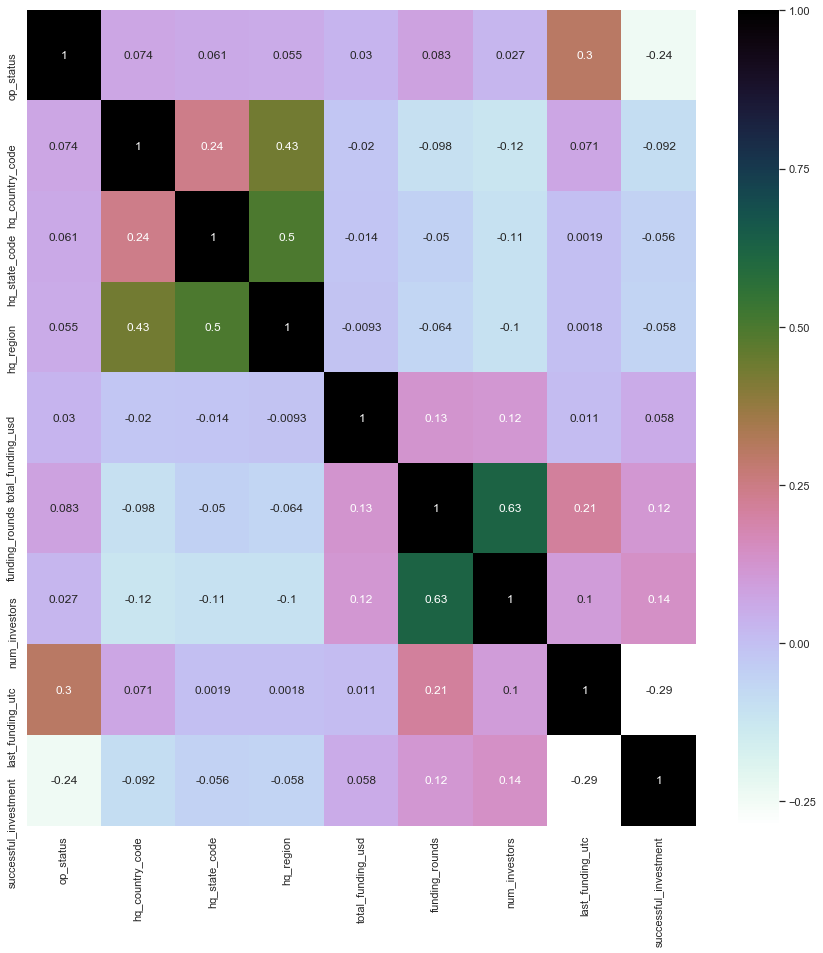

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)
plt.figure(figsize=(15,15)) 
sns.heatmap(df1.corr(),annot=True,cmap='cubehelix_r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214CCD97E10>,
      dtype=object)

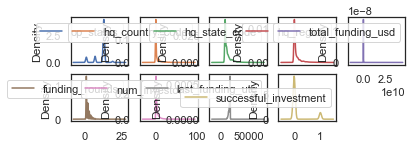

In [144]:
df1.plot(kind='density', subplots=True, layout=(4,5), sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214CCD97E80>,
      dtype=object)

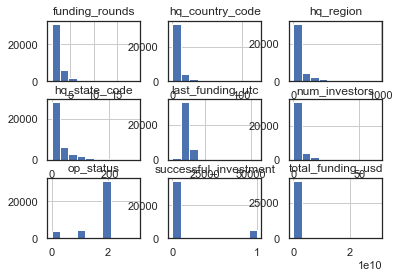

In [145]:
df1.hist()

In [147]:
submission_final = pnd.DataFrame({'successful_investment':y_pred})

In [150]:
submission_final.head()

,successful_investment
0,0
1,0
2,1
3,1
4,0


In [151]:
filename = 'Submission_final.csv'

submission_final.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Submission_final.csv
